In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [8, 6]
plt.rcParams['font.size'] = 12

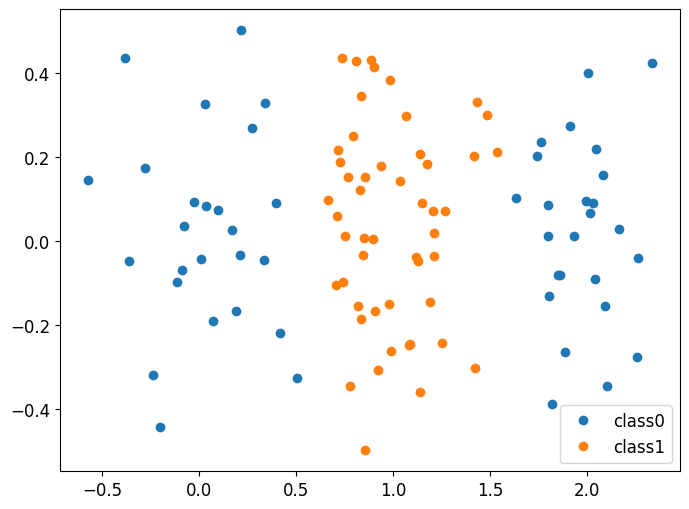

In [2]:
import numpy as np
np.random.seed(0)

m00 = np.array([0, 0])
m01 = np.array([2,0])
m1 = np.array([1, 0])
s = 0.05

x00 = np.random.multivariate_normal(m00, np.eye(2)*s, 25)
x01 = np.random.multivariate_normal(m01, np.eye(2)*s, 25)
x0 = np.vstack((x00, x01))
x1 = np.random.multivariate_normal(m1, np.eye(2)*s, 50)

plt.plot(x0[:, 0], x0[:, 1], 'o', label='class0')
plt.plot(x1[:, 0], x1[:, 1], 'o', label='class1')
plt.legend()

In [3]:
y0 = np.zeros(x0.shape[0])
y1 = np.ones(x1.shape[0])
X = np.vstack((x0, x1))
y = np.hstack((y0, y1)).astype(int)

sort_i = np.argsort(X[:, 0])
X = X[sort_i]
y = y[sort_i]

In [4]:
from kdenaivebayes import KDENaiveBayesClassifier
from kdenaivebayes.backends.sklearn import IndependentSKLearnKDEBackend

In [5]:
kde = KDENaiveBayesClassifier(backend_factory=IndependentSKLearnKDEBackend).fit(X, y)

In [6]:
y, kde.predict(X, class_weight=[2, 1])

(array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]),
 array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]))